# <b> A Film Revenue and It's Dependencies </b>

### CONTENTS
[0.  Intro](#introduction) <br>
[1.  Libraries](#libraries) <br>
[2.  Data](#data) <br>
[3.  Cleaning](#cleaning) <br>
[4.  Revenue Correlation](#correlation-with-gross-revenue) <br>
[4.1 Scatter Plot](#scatterplot--budget-vs-gross-revenue) <br>
[4.2 Regression Plot](#regression-plot--budget-vs-gross-revenue) <br>
[4.3 Heatmap](#heatmap) <br>
[4.4 Numerization of ObjectTypes](#numerization-of-object-data-types)<br>
[5.  Conclusion](#conclusion)<br>

## Introduction

Hundreds of movies get released every year. It naturally consumes truckloads amount of money to produce a single movie. So, it is definitely worth looking at the revenue a production house is making after the release. More importantly the factors which are directly connected to the revenue. This project targets exactly this important point.

## Libraries

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

## Data

In [3]:
df_raw = pd.read_csv("E:\VSCode\Projects\MovieIndustry\movies(updated).csv")
df_raw.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Finding if there is any missing data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


<li>So as we can see some of the columns have missing values in quite a few rows. Now if we fill the cells with value 0 then it will drastically hamper the result as we are going to find the correlation. So, we would drop the rows with missing values for particular columns.</li>
<li>we can also get the info about the data types of every columns</li>

[back to top](#contents)

## Cleaning

### Remove Rows with Missing Values

In [5]:
df = df_raw.dropna(axis=0, subset=['budget','gross','votes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5436 non-null   object 
 1   rating    5424 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int64  
 4   released  5436 non-null   object 
 5   score     5436 non-null   float64
 6   votes     5436 non-null   float64
 7   director  5436 non-null   object 
 8   writer    5436 non-null   object 
 9   star      5436 non-null   object 
 10  country   5435 non-null   object 
 11  budget    5436 non-null   float64
 12  gross     5436 non-null   float64
 13  company   5434 non-null   object 
 14  runtime   5435 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 679.5+ KB


Now for our purpose, the Budget and Gross column dont need to be a float Data Type. So we are gonna change the Type to int64.

In [6]:
# changing the data type of 'budget' and 'gross'
df = df.astype({"budget" : int, "gross" : int, "votes" : int})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5436 non-null   object 
 1   rating    5424 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int64  
 4   released  5436 non-null   object 
 5   score     5436 non-null   float64
 6   votes     5436 non-null   int32  
 7   director  5436 non-null   object 
 8   writer    5436 non-null   object 
 9   star      5436 non-null   object 
 10  country   5435 non-null   object 
 11  budget    5436 non-null   int32  
 12  gross     5436 non-null   int32  
 13  company   5434 non-null   object 
 14  runtime   5435 non-null   float64
dtypes: float64(2), int32(3), int64(1), object(9)
memory usage: 615.8+ KB


### Dropping Duplicates

Now we faced a problem here that a same company name can be registered in a slightly modified form mistakenly. So, we must get rid of these duplicates.

In [7]:
df = df["company"].drop_duplicates().sort_values()
df.head()

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
2929                          1492 Pictures
385                        1818 Productions
Name: company, dtype: object

[back to top](#contents)

## Correlation with Gross Revenue

Now, let's assume that the budget of the films and the company which produced the films, are mostly correlated with the gross revenue the movies generate. The more budget a movie has or the bigger the producton company is the movie revenue should also be higher. Let's check if this hypothesis is correct or not. 

Now let's look at the films with the highest revenue.

In [101]:
df_sorted_gross = df.sort_values(by = ['gross'], inplace= False, ascending = False)
df_sorted_gross.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0


### Scatterplot ( Budget vs Gross Revenue )

Text(0, 0.5, 'Budget for Films')

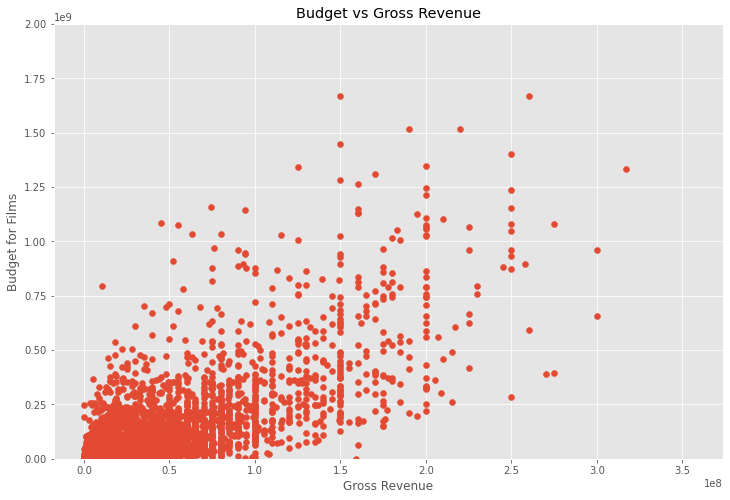

In [102]:
# scatterplot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.ylim([0,2*10**9])
plt.xlabel('Gross Revenue')
plt.ylabel('Budget for Films')

### Regression Plot ( Budget vs Gross Revenue )

To get a more proper correlation with budget, we will plot a Regression Plot with respect to Revenue.

(0.0, 2000000000.0)

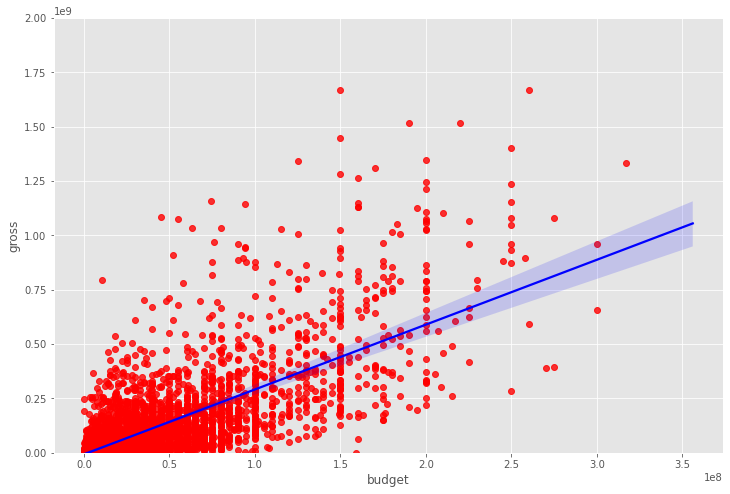

In [103]:
#budget vs gross (regplot)
sns.regplot(x='budget', y='gross', data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.ylim([0,2*10**9])

### Heatmap

Now to get the relation more clearly we will try to analyse the dependencies on other paramaters also. Here some of the column are not of int64 or float64 data type. So we can not directly include those data into the correlation heatmap. We will address this problem in a bit.

In [104]:
# Tho correlation table looks as follows.
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.267580,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.200726,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.550848,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.669421,0.318595
gross,0.267580,0.200726,0.550848,0.669421,1.000000,0.223576
runtime,0.074203,0.414580,0.352437,0.318595,0.223576,1.000000


Thus from the table itself, we can understand that gross and budget are highly correlated only. There are different types of correlations pearson, kendall, spearman and all. Here we used the default type that is 'Pearson'. But along with that, we also can see that another parameter , 'votes' also shows high correlation with gross. We didn't think about it first. Thus from the correlation table, a completlely unexpected information came out.

Text(87.0, 0.5, 'Movie Features')

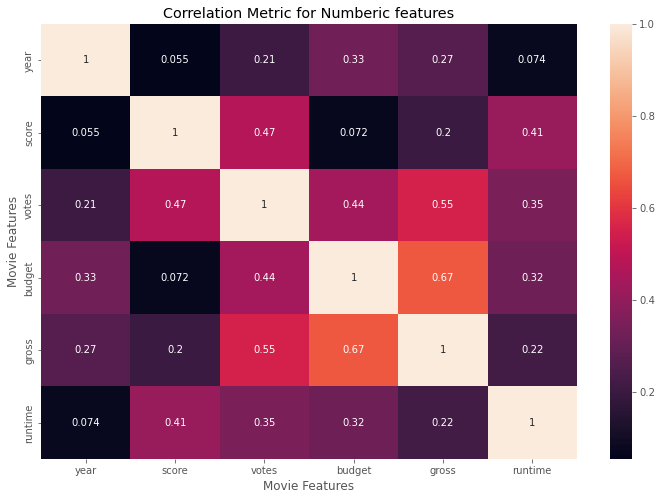

In [105]:
# plotting the Heatmap

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Metric for Numberic features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

Thus from this heatmap, it gets very clear that as of now, it's not only the budget that is mostly correlated with the revenue, but votes also plays a crucial role in the revenue numbers.

[back to top](#contents)

### Numerization of Object Data Types

as we discussed earlier there was a problem with the non numeric data in our DataFrame. They can't be included directly to a heatmap. So, we are going to make the non numeric data to numeric data here.

As our second assumption was that the company name can also have a significant impact on the revenue, let's see how correct that is. But while numerizing the strings of Company Name column, let's numerize the other sitring type columns as well. Then we would be able to look into other factors also aside from Company Data.

In [106]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.4,927000,1800,2841,700,46,19000000,46998772,1432,146.0
1,3943,6,1,1980,1131,5.8,65000,1581,1160,215,47,4500000,58853106,454,104.0
2,3654,4,0,1980,1363,8.7,1200000,759,1822,1161,47,18000000,538375067,949,124.0
3,205,4,4,1980,1131,7.7,221000,891,1416,1478,47,3500000,83453539,1114,88.0
4,734,6,4,1980,1174,7.3,108000,721,352,272,47,6000000,39846344,1089,98.0


Now, let's plot another Heatmap with all the newly numerized parameters along with the previous parameters.

Text(87.0, 0.5, 'Movie Features')

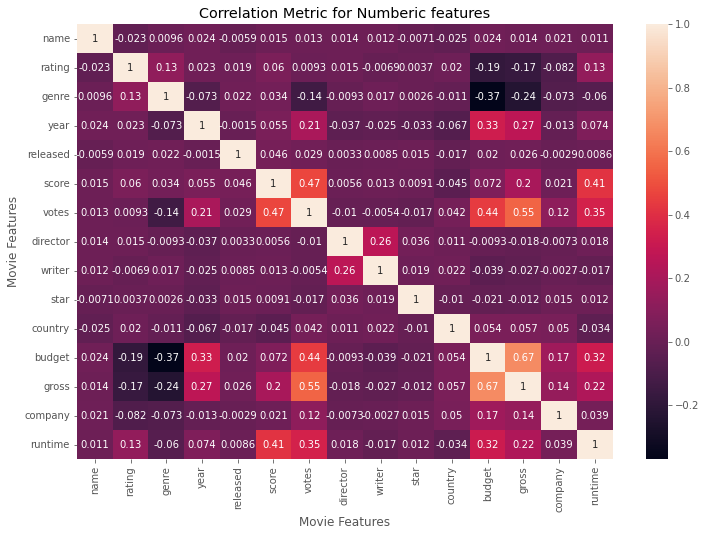

In [107]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Metric for Numberic features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

## Conclusion

Thus from the heat map, we can see although 'votes' and 'budget' impact revenue largely, the company brandings have no correlation with the revnue figure at all.

[back to top](#contents)